# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
print(url + "&q=seattle")

https://api.openweathermap.org/data/2.5/weather?units=metric&appid=a562407e90023794537b425c73b6e8c7&q=seattle


In [5]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
#     print(city_url)

    # Run an API request for each of the cities
    
    
    
    
    
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | volodarskiy
Processing Record 3 of Set 1 | tagta
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | atafu village
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | hamilton
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | st. john's
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | mammoth lakes
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | bethel
Processing 

Processing Record 38 of Set 4 | norton shores
Processing Record 39 of Set 4 | vilyuchinsk
Processing Record 40 of Set 4 | hailar
Processing Record 41 of Set 4 | albacete
Processing Record 42 of Set 4 | nadi
Processing Record 43 of Set 4 | arkhangel'sk
Processing Record 44 of Set 4 | gamba
Processing Record 45 of Set 4 | xilin hot
Processing Record 46 of Set 4 | pandan
Processing Record 47 of Set 4 | port blair
Processing Record 48 of Set 4 | al qanatir al khayriyah
Processing Record 49 of Set 4 | luanda
Processing Record 0 of Set 5 | boali
Processing Record 1 of Set 5 | loudun
Processing Record 2 of Set 5 | tucuma
Processing Record 3 of Set 5 | al 'aziziyah
Processing Record 4 of Set 5 | mount pearl
Processing Record 5 of Set 5 | chu
Processing Record 6 of Set 5 | muroto-misakicho
Processing Record 7 of Set 5 | vilyuysk
Processing Record 8 of Set 5 | klyuchi
Processing Record 9 of Set 5 | boende
Processing Record 10 of Set 5 | nadym
Processing Record 11 of Set 5 | shakawe
Processing Re

Processing Record 30 of Set 8 | sao miguel do araguaia
Processing Record 31 of Set 8 | nizao
Processing Record 32 of Set 8 | el nido
Processing Record 33 of Set 8 | al qubbah
Processing Record 34 of Set 8 | dili
Processing Record 35 of Set 8 | kudamatsu
Processing Record 36 of Set 8 | kill devil hills
Processing Record 37 of Set 8 | sebis
Processing Record 38 of Set 8 | laurel
Processing Record 39 of Set 8 | kvissleby
Processing Record 40 of Set 8 | palikir - national government center
Processing Record 41 of Set 8 | alice springs
Processing Record 42 of Set 8 | manvi
Processing Record 43 of Set 8 | yelovo
Processing Record 44 of Set 8 | champagnole
Processing Record 45 of Set 8 | deqen
Processing Record 46 of Set 8 | colonia
Processing Record 47 of Set 8 | rabaul
Processing Record 48 of Set 8 | coronel dorrego
Processing Record 49 of Set 8 | hola
Processing Record 0 of Set 9 | healesville
Processing Record 1 of Set 9 | port douglas
Processing Record 2 of Set 9 | laporte
Processing Rec

Processing Record 17 of Set 12 | cacoal
Processing Record 18 of Set 12 | pacasmayo
Processing Record 19 of Set 12 | hankasalmi
Processing Record 20 of Set 12 | al ghayzah
Processing Record 21 of Set 12 | grand-bassam
Processing Record 22 of Set 12 | harstad
Processing Record 23 of Set 12 | jianshui
Processing Record 24 of Set 12 | maxixe
Processing Record 25 of Set 12 | evanston
Processing Record 26 of Set 12 | santa maria da vitoria
Processing Record 27 of Set 12 | kodinsk
Processing Record 28 of Set 12 | shimoda
Processing Record 29 of Set 12 | akureyri
Processing Record 30 of Set 12 | rio grande
Processing Record 31 of Set 12 | wellington
Processing Record 32 of Set 12 | paracatu
Processing Record 33 of Set 12 | reftinskiy
Processing Record 34 of Set 12 | tual
Processing Record 35 of Set 12 | dunedin
Processing Record 36 of Set 12 | beichengqu
Processing Record 37 of Set 12 | kuta
Processing Record 38 of Set 12 | kargat
-----------------------------
Data Retrieval Complete      
---

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,10.60,79,18,3.16,ZA,1694969351
1,volodarskiy,46.4013,48.5409,14.99,74,100,1.26,RU,1694969351
2,tagta,41.6504,59.9164,21.97,40,0,3.09,TM,1694969351
3,port-aux-francais,-49.3500,70.2167,5.48,97,100,13.11,TF,1694969352
4,yellowknife,62.4560,-114.3525,13.01,90,100,5.66,CA,1694969352


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,10.60,79,18,3.16,ZA,1694969351
1,volodarskiy,46.4013,48.5409,14.99,74,100,1.26,RU,1694969351
2,tagta,41.6504,59.9164,21.97,40,0,3.09,TM,1694969351
3,port-aux-francais,-49.3500,70.2167,5.48,97,100,13.11,TF,1694969352
4,yellowknife,62.4560,-114.3525,13.01,90,100,5.66,CA,1694969352


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

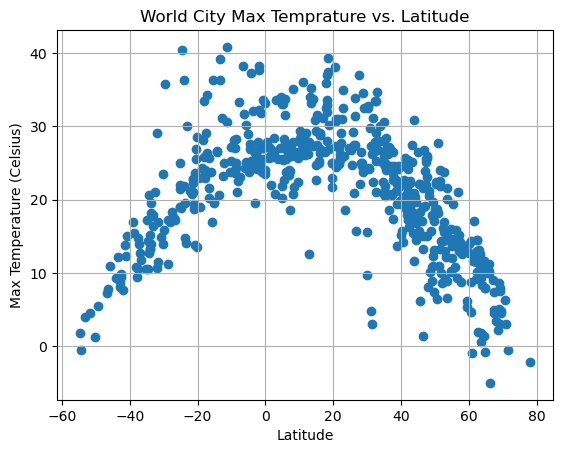

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)


# Incorporate the other graph properties
plt.title("World City Max Temprature vs. Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

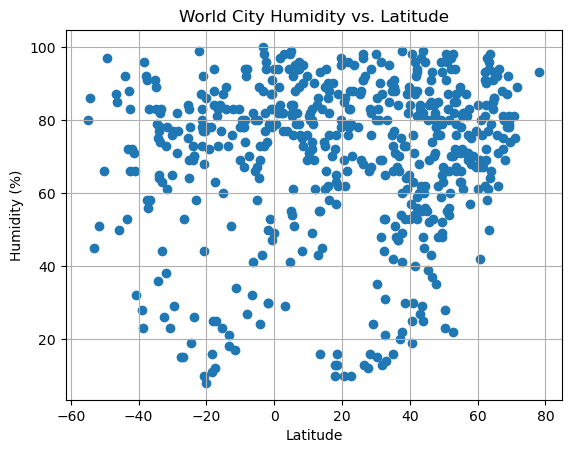

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Incorporate the other graph properties
plt.title("World City Humidity vs. Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

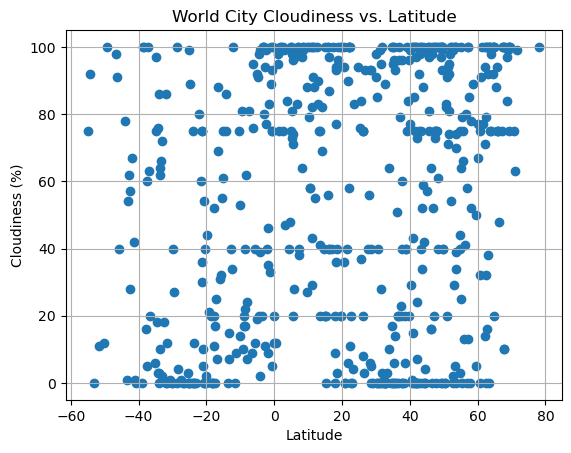

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Incorporate the other graph properties
plt.title("World City Cloudiness vs. Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

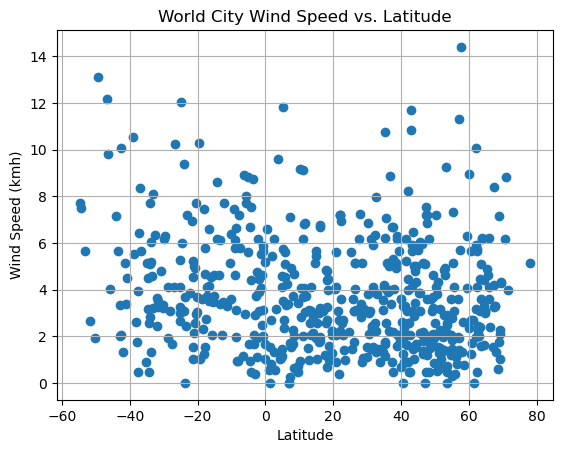

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")
plt.ylabel("Wind Speed (kmh)")
plt.xlabel("Latitude")
plt.grid(True)
# Incorporate the other graph properties
plt.title("World City Wind Speed vs. Latitude")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_liner_regression(x_value, y_value, title, text_coord):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x 9 {round(intercept,2)}"
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    plt.xlabel("Lat")
    plt.ylabel(title)
    print(f"The r-value is {rvalue ** 2}")
    plt.show()
    

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,volodarskiy,46.4013,48.5409,14.99,74,100,1.26,RU,1694969351
2,tagta,41.6504,59.9164,21.97,40,0,3.09,TM,1694969351
4,yellowknife,62.4560,-114.3525,13.01,90,100,5.66,CA,1694969352
10,hamilton,39.1834,-84.5333,24.58,61,100,2.06,US,1694969330
11,albany,42.6001,-73.9662,22.32,60,92,0.45,US,1694969352


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,10.60,79,18,3.16,ZA,1694969351
3,port-aux-francais,-49.3500,70.2167,5.48,97,100,13.11,TF,1694969352
5,blackmans bay,-43.0167,147.3167,8.07,72,54,3.33,AU,1694969353
6,edinburgh of the seven seas,-37.0676,-12.3116,12.76,83,63,8.36,SH,1694969353
7,grytviken,-54.2811,-36.5092,-0.46,86,92,7.49,GS,1694969353


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.598189652832502


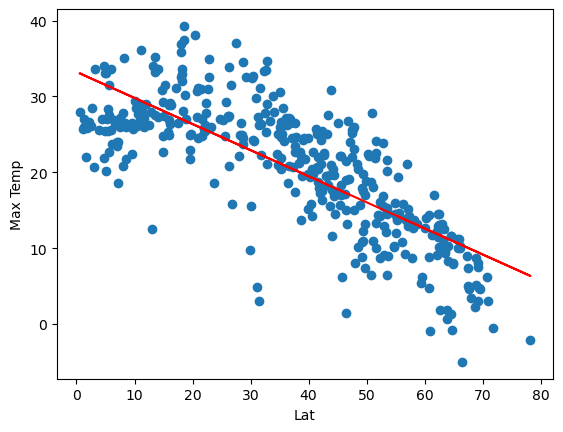

In [17]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_liner_regression(x_values, y_values, "Max Temp", (6, -10))

The r-value is 0.6091362703740559


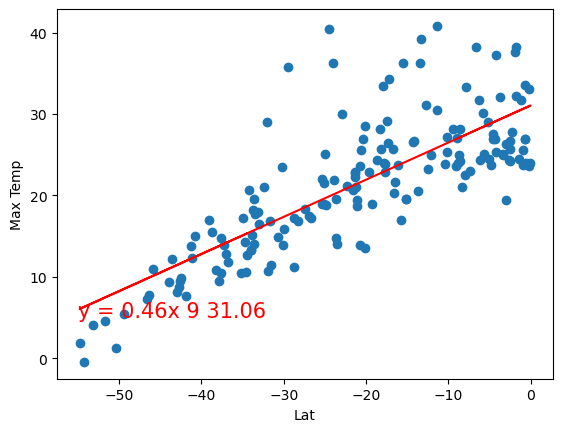

In [18]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_liner_regression(x_values, y_values, "Max Temp", (-55, 5))

**Discussion about the linear relationship:** In northern hemisphere, temprature and latitude is inversely proportional as temprature decreases when latitude increases.  In southern hemisphere, temprature and latitude is directly proportional as temprature increases when latitude increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.00042338824352511416


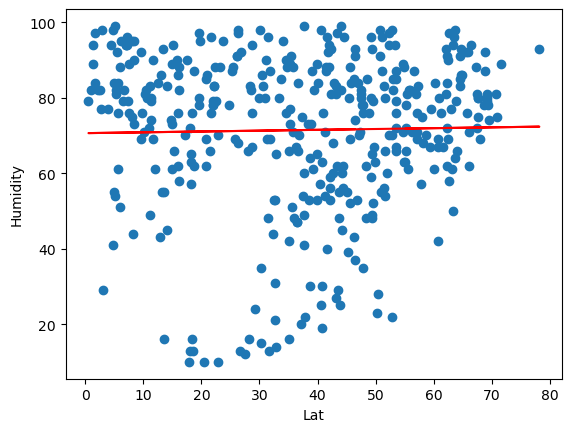

In [19]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_liner_regression(x_values, y_values, "Humidity", (50, -20))

The r-value is 0.000604303491334681


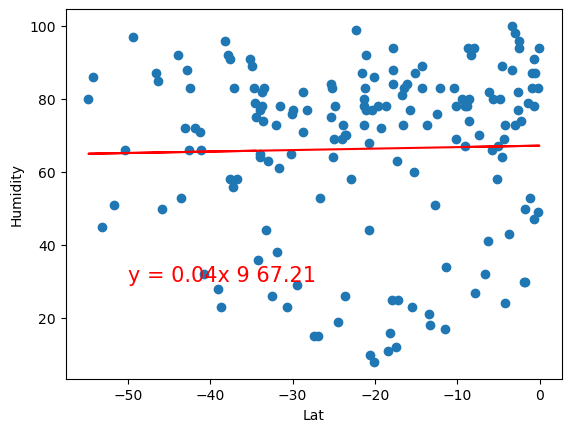

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_liner_regression(x_values, y_values, "Humidity", (-50, 30))

**Discussion about the linear relationship:** There is no material correlation between humidity and latitude in both northern and souther hemipheres as regression lines are either flat or close to flat.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 4.8573917284384616e-05


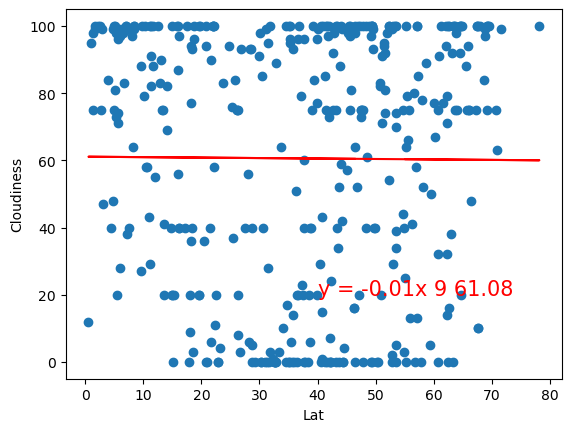

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_liner_regression(x_values, y_values, "Cloudiness", (40, 20))

The r-value is 0.010109353428653213


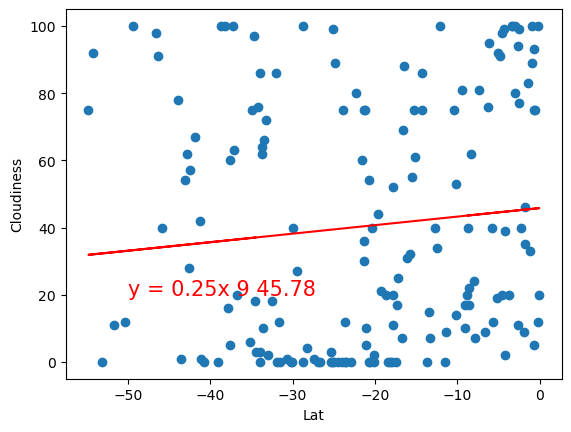

In [22]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_liner_regression(x_values, y_values, "Cloudiness", (-50, 20))

**Discussion about the linear relationship:** There is no material correlation between cloudiness and latitude in both northern and souther hemipheres as regression lines are either flat or close to flat.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.0011479721172878731


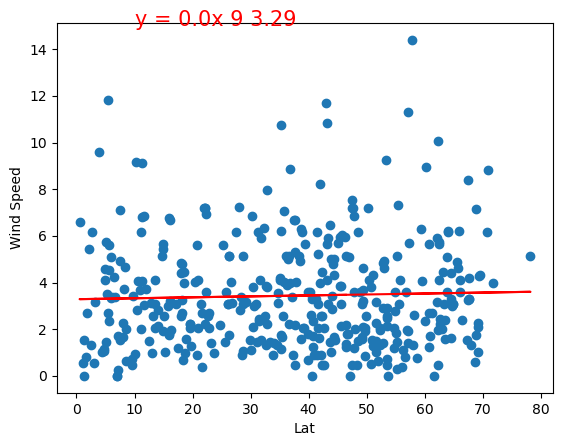

In [23]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_liner_regression(x_values, y_values, "Wind Speed", (10, 15))

The r-value is 0.023659451542007964


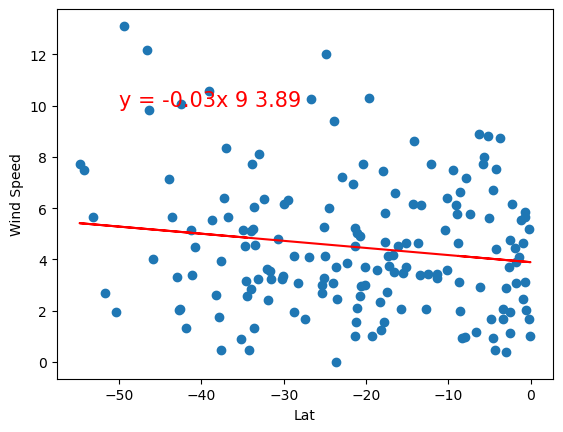

In [24]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_liner_regression(x_values, y_values, "Wind Speed", (-50, 10))

**Discussion about the linear relationship:** There is no material correlation between wind speed and latitude in both northern and souther hemipheres as regression lines are either flat or close to flat.